<a href="https://colab.research.google.com/github/Gift07/market-analysis/blob/main/btcether-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Interacting with crypto data
> Obtained from _crypto watch_

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def get_historic_prices(symbol, exchange="bitfinex", after="2018-09-01"):
  url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
      symbol=symbol, exchange=exchange
      )
  resp = requests.get(url, params={
      "periods":"3600",
      'after': str(int(pd.Timestamp(after).timestamp()))
  })
  resp.raise_for_status()
  data = resp.json()
  df = pd.DataFrame(data['result']['3600'], columns=[
      "CloseTime", "OpenPrice","HighPrice","LowPrice","ClosePrice","Volume","NA"
      ])
  df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
  df.set_index('CloseTime',inplace=True)
  return df

getting data for the whole week

In [4]:
last_week = (pd.Timestamp.now()- pd.offsets.Day(7))
last_week

Timestamp('2022-10-21 11:34:50.070075')

Getting price information

In [11]:
btc = get_historic_prices('btc', 'bitstamp',after=last_week)
eth = get_historic_prices("eth", 'bitstamp', after=last_week)

**Bitcoin**

In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-21 12:00:00,19002,19007,18941,18944,55.240525,1.048857e+06
2022-10-21 13:00:00,18946,18946,18660,18882,415.165337,7.800918e+06
2022-10-21 14:00:00,18877,19082,18860,19064,155.850947,2.956618e+06
2022-10-21 15:00:00,19068,19127,18940,18978,139.620696,2.660399e+06
2022-10-21 16:00:00,18978,19169,18951,19166,225.448405,4.299695e+06


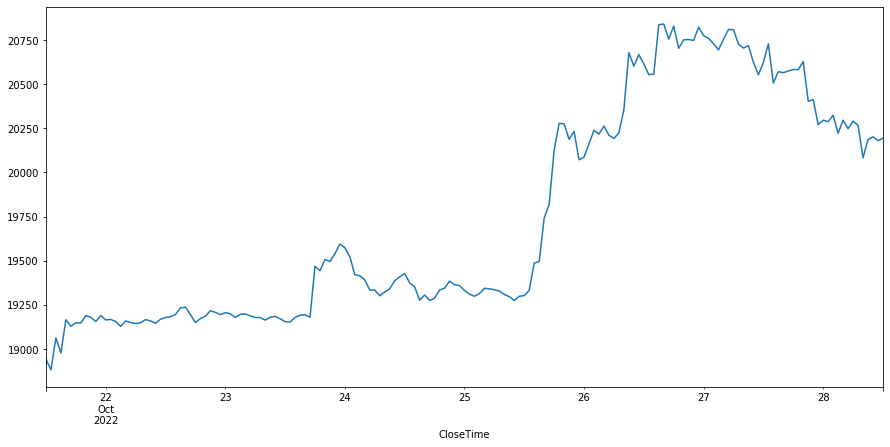

In [14]:
btc["ClosePrice"].plot(figsize=(15,7))

**Ether**

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-21 12:00:00,1281.2,1281.2,1275.0,1275.7,282.448689,3.610876e+05
2022-10-21 13:00:00,1275.7,1275.8,1252.8,1270.1,4518.755049,5.703679e+06
2022-10-21 14:00:00,1269.4,1286.3,1269.0,1286.3,1776.743855,2.266561e+06
2022-10-21 15:00:00,1286.2,1290.5,1275.9,1279.8,1092.091391,1.403135e+06
2022-10-21 16:00:00,1279.5,1297.7,1278.1,1297.4,1609.527756,2.075199e+06


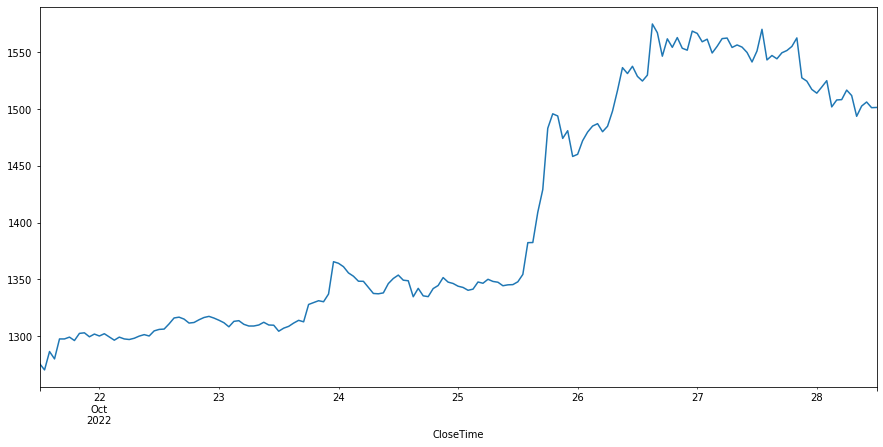

In [16]:
eth["ClosePrice"].plot(figsize=(15,7))

In [17]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,19742.378698,19796.207101,19691.301775,19748.828402,70.836087,1.411154e+06
std,624.952026,647.617923,604.332107,622.824538,88.023394,1.760924e+06
min,18877.000000,18946.000000,18660.000000,18882.000000,5.287441,1.013235e+05
25%,19191.000000,19210.000000,19177.000000,19194.000000,20.105087,3.853344e+05
50%,19384.000000,19430.000000,19332.000000,19387.000000,38.340233,7.895651e+05
75%,20294.000000,20333.000000,20215.000000,20291.000000,73.196970,1.519592e+06
max,20852.000000,21012.000000,20799.000000,20841.000000,475.689379,9.525856e+06


**Exporting to excel**

In [18]:
writer = pd.ExcelWriter('cryptos.xlsx')

Writing to defferent excel sheets

In [19]:
btc.to_excel(writer, sheet_name="Bitcoin")
eth.to_excel(writer, sheet_name='Ether')
writer.save()